In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/death_risk_factor.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Year                                      6468 non-null   int64  
 2   Unsafe water source                       6468 non-null   float64
 3   Unsafe sanitation                         6468 non-null   float64
 4   No access to handwashing facility         6468 non-null   float64
 5   Household air pollution from solid fuels  6468 non-null   float64
 6   Non-exclusive breastfeeding               6468 non-null   float64
 7   Discontinued breastfeeding                6468 non-null   float64
 8   Child wasting                             6468 non-null   float64
 9   Child stunting                            6468 non-null   float64
 10  Low birth weight for gestation      

In [ ]:
df.head()

df = df[df['Entity'] != 'World']

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)

missing_data

,Missing Values,Percentage
High total cholesterol,4886,75.869565
Outdoor air pollution,1,0.015528
Entity,0,0.000000
Unsafe sex,0,0.000000
Diet low in whole grains,0,0.000000
Diet high in sodium,0,0.000000
Air pollution,0,0.000000
Low bone mineral density,0,0.000000
Vitamin A deficiency,0,0.000000
Iron deficiency,0,0.000000


In [ ]:
# Fill or drop missing values (example: forward fill for simplicity)
df.fillna(method='ffill', inplace=True)

In [ ]:
# Verify no more missing values
print(df.isnull().sum())
print(df.info())

Entity                                      0
Year                                        0
Unsafe water source                         0
Unsafe sanitation                           0
No access to handwashing facility           0
Household air pollution from solid fuels    0
Non-exclusive breastfeeding                 0
Discontinued breastfeeding                  0
Child wasting                               0
Child stunting                              0
Low birth weight for gestation              0
Secondhand smoke                            0
Alcohol use                                 0
Drug use                                    0
Diet low in fruits                          0
Diet low in vegetables                      0
Unsafe sex                                  0
Low physical activity                       0
High fasting plasma glucose                 0
High total cholesterol                      0
High body-mass index                        0
High systolic blood pressure      

In [ ]:
df['High total cholesterol'].head()

0    9505.531962
1    9505.531962
2    9505.531962
3    9505.531962
4    9505.531962
Name: High total cholesterol, dtype: float64

In [ ]:
df_diet = df[['Entity', 'Year', 'Diet low in fruits', 'Diet low in vegetables', 'Low physical activity', 'Smoking', 'Diet high in sodium', 'Diet low in whole grains', 'Diet low in nuts and seeds', 'Iron deficiency', 'Vitamin A deficiency', 'High body-mass index', 'High systolic blood pressure', 'High fasting plasma glucose', 'High total cholesterol', 'Low bone mineral density', 'Alcohol use']]

In [ ]:
df_diet.head()

,Entity,Year,Diet low in fruits,Diet low in vegetables,Low physical activity,Smoking,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds,Iron deficiency,Vitamin A deficiency,High body-mass index,High systolic blood pressure,High fasting plasma glucose,High total cholesterol,Low bone mineral density,Alcohol use
0,Afghanistan,1990,8538.964137,7678.717644,4221.303183,6393.667372,2737.197934,11381.37735,7299.867330,726.431294,9344.131952,7701.581280,28183.98335,21610.06616,9505.531962,374.844056,356.529307
1,Afghanistan,1991,8642.847151,7789.773033,4252.630379,6429.253320,2741.184956,11487.83239,7386.764303,739.245799,9330.182378,7747.774903,28435.39751,21824.93804,9505.531962,379.854237,320.598461
2,Afghanistan,1992,8961.526496,8083.234634,4347.330897,6561.054957,2798.560245,11866.23557,7640.628526,873.485341,9769.844533,7991.018971,29173.61120,22418.69881,9505.531962,388.130434,293.257016
3,Afghanistan,1993,9377.118485,8452.242405,4465.137670,6731.972560,2853.301679,12335.96168,7968.311853,1040.047422,11433.769490,8281.564408,30074.76091,23140.51117,9505.531962,405.577931,278.129758
4,Afghanistan,1994,9688.448554,8755.372045,4566.650504,6889.328118,2880.025765,12672.95019,8244.368430,1101.764645,12936.955860,8472.297780,30809.49117,23725.07008,9505.531962,415.349195,250.691569


Question 1: Does dietary  habits  and  low physical  activity levels  contribute to deaths  related  to high  fasting  plasma glucose ?

In [ ]:
df_diet_y1 = df_diet[['Diet low in fruits', 'Diet low in vegetables', 'Low physical activity', 'High fasting plasma glucose']]

# Calculate the correlation coefficients
corr_matrix = df_diet_y1.corr()

# # Get the correlations of interest
corr_high_fasting_plasma_glucose = corr_matrix['High fasting plasma glucose']
corr_diet_low_fruits = corr_high_fasting_plasma_glucose['Diet low in fruits']
corr_diet_low_vegetables = corr_high_fasting_plasma_glucose['Diet low in vegetables']
corr_low_physical_activity = corr_high_fasting_plasma_glucose['Low physical activity']

# Print the results
print("Correlation between high fasting plasma glucose and diet low in fruits:", corr_diet_low_fruits)
print("Correlation between high fasting plasma glucose and diet low in vegetables:", corr_diet_low_vegetables)
print("Correlation between high fasting plasma glucose and low physical activity:", corr_low_physical_activity)


Correlation between high fasting plasma glucose and diet low in fruits: 0.9081714891979786
Correlation between high fasting plasma glucose and diet low in vegetables: 0.950195502404859
Correlation between high fasting plasma glucose and low physical activity: 0.9550157544487876


Are there significant   differences  in diet-related mortality  rates across  different  entities  or countries  ?


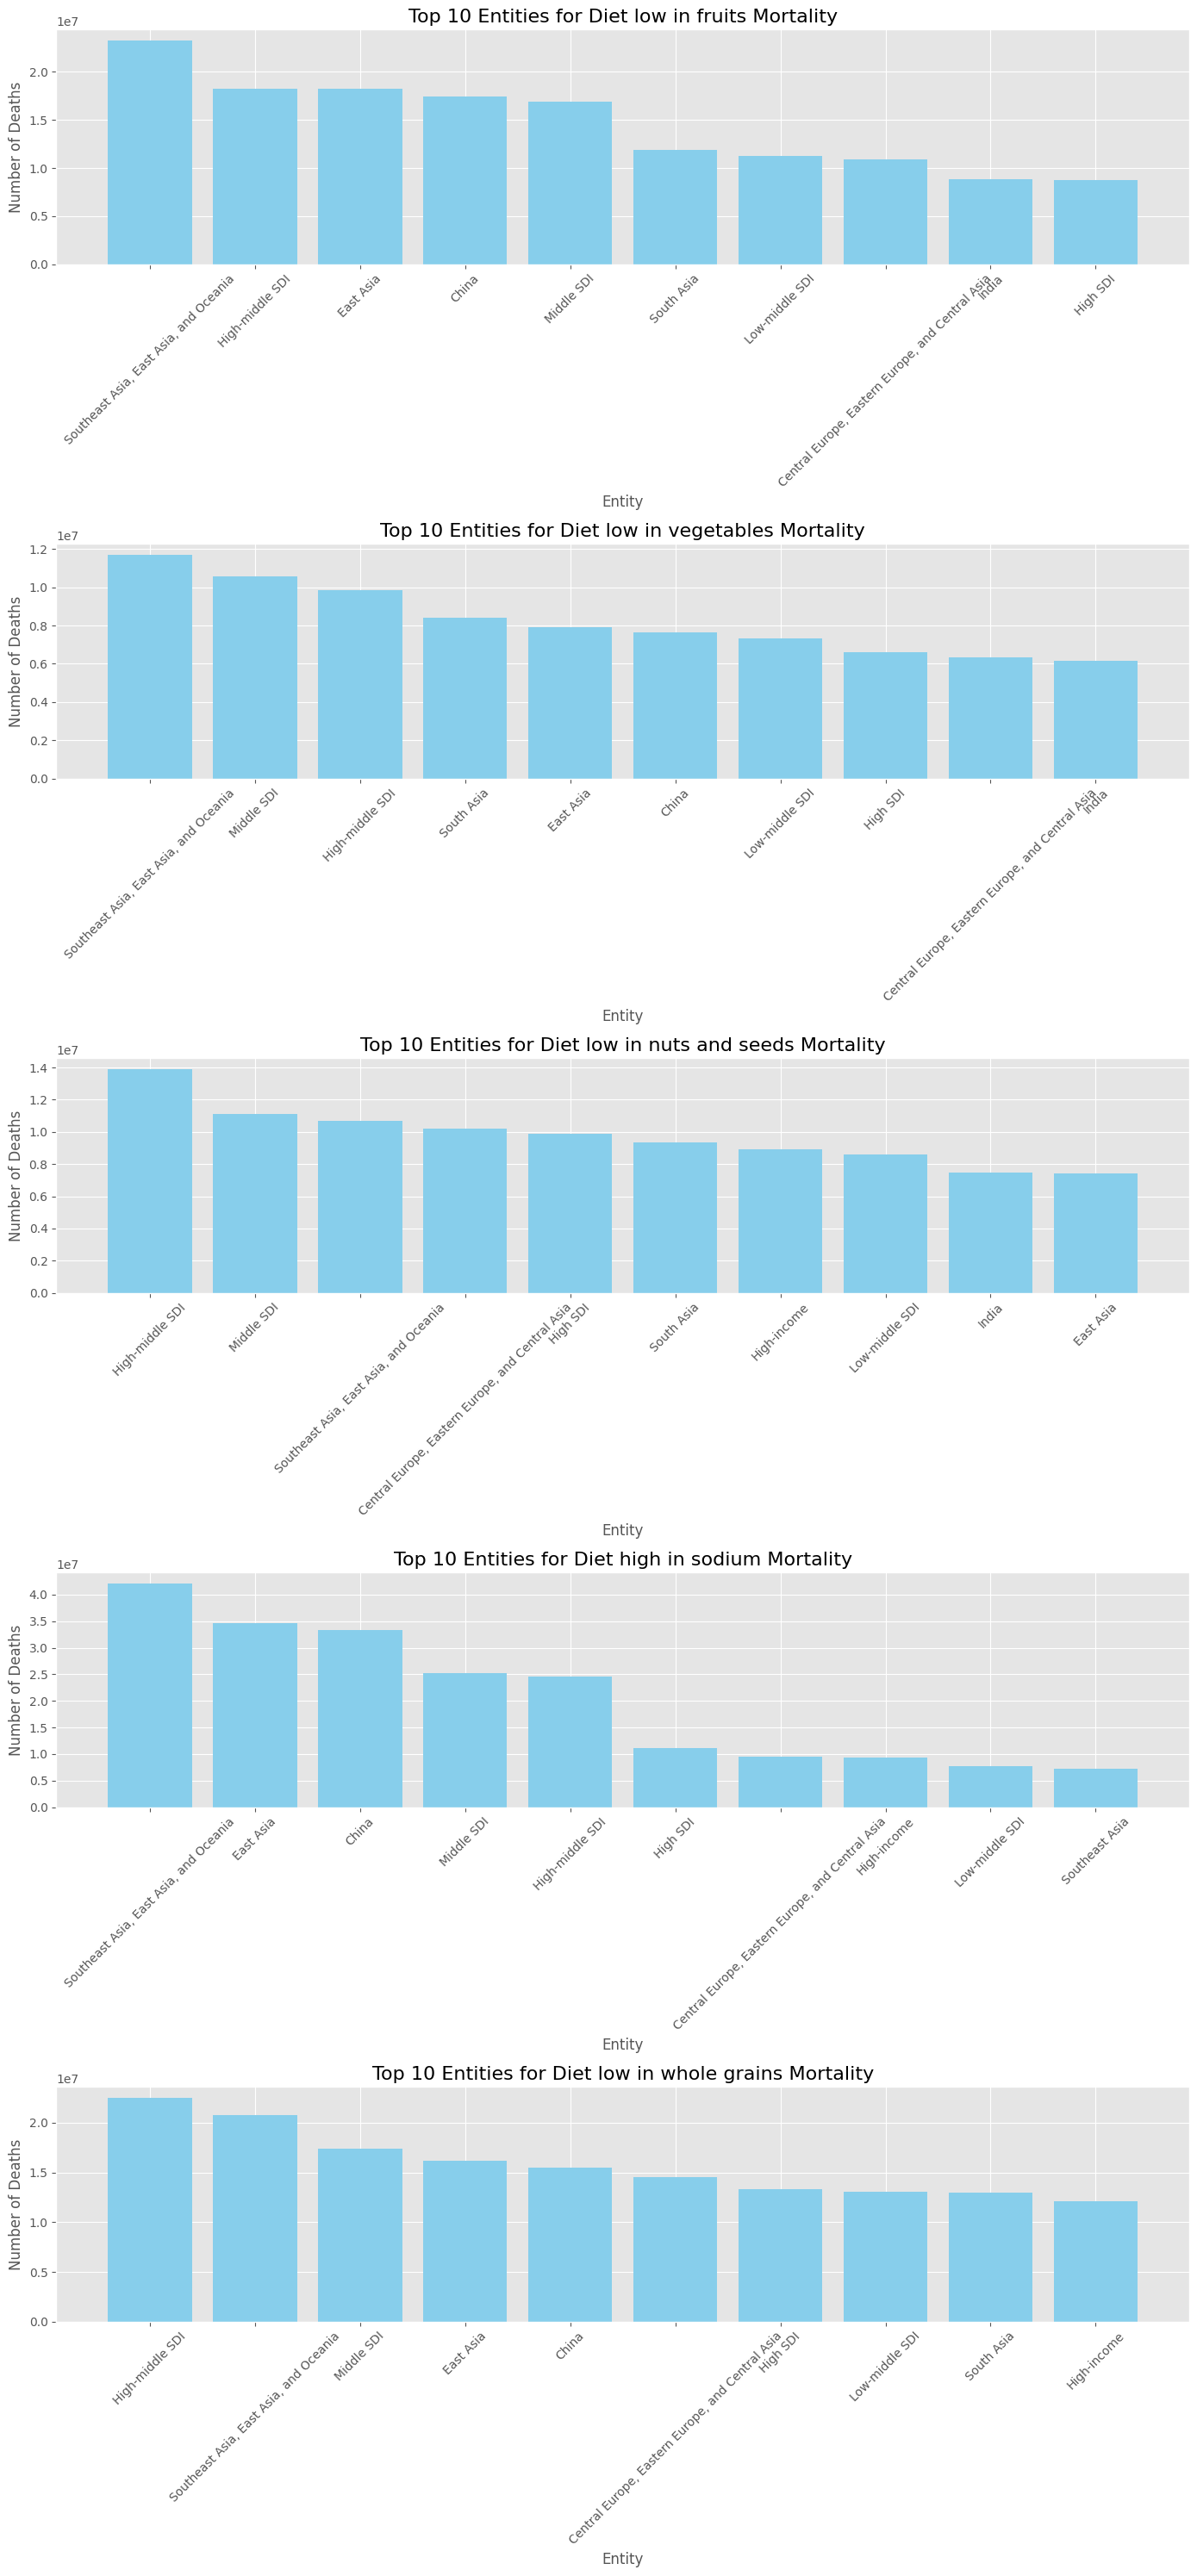

In [ ]:
diet_factors = [
    'Diet low in fruits',
    'Diet low in vegetables',
    'Diet low in nuts and seeds',
    'Diet high in sodium',
    'Diet low in whole grains'
]

# Initialize a figure for subplots
fig, axs = plt.subplots(nrows=len(diet_factors), ncols=1, figsize=(14, 30))

# Loop through each diet-related factor
for i, factor in enumerate(diet_factors):
    # Group by 'Entity' and sum the deaths
    factor_data = df_diet.groupby('Entity')[factor].sum().reset_index()

    # Sort values in descending order and select top 10 entities
    top_10_entities = factor_data.sort_values(by=factor, ascending=False).head(10)

    # Create bar plot
    axs[i].bar(top_10_entities['Entity'], top_10_entities[factor], color='skyblue')
    axs[i].set_title(f'Top 10 Entities for {factor} Mortality', fontsize=16)
    axs[i].set_xlabel('Entity', fontsize=12)
    axs[i].set_ylabel('Number of Deaths', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

How do dietary habits and lifestyle  factors collectively  influence  mortality  rates related  to diabetes,  as measured  by the number of deaths with high  fasting  plasma  glucose  levels?

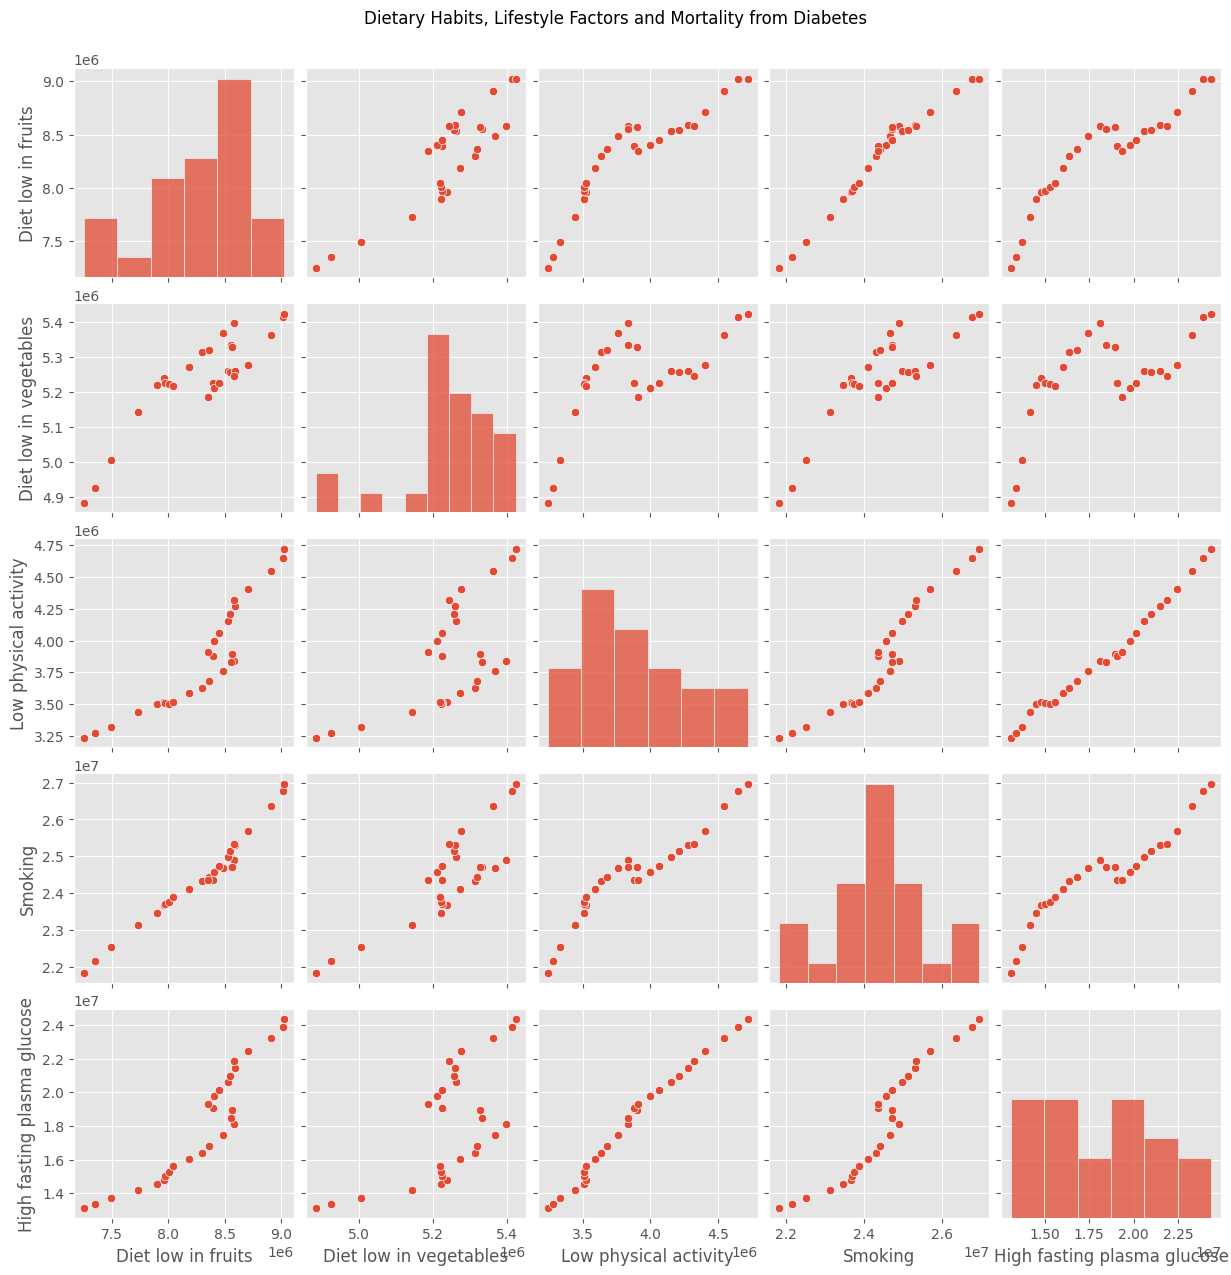

In [ ]:
diet_grouped_year = df_diet.groupby('Year').sum()

# Pairplot to show relationships between various dietary habits and high fasting plasma glucose
sns.pairplot(diet_grouped_year, vars=['Diet low in fruits', 'Diet low in vegetables', 'Low physical activity', 'Smoking', 'High fasting plasma glucose'])
plt.suptitle('Dietary Habits, Lifestyle Factors and Mortality from Diabetes', y=1.02)
plt.show()


What is the relationship  between low grain consumption  and mortality  rates related  to high cholesterol,

Correlation between Diet low in whole grains and High total cholestrol: 0.6480812531637761


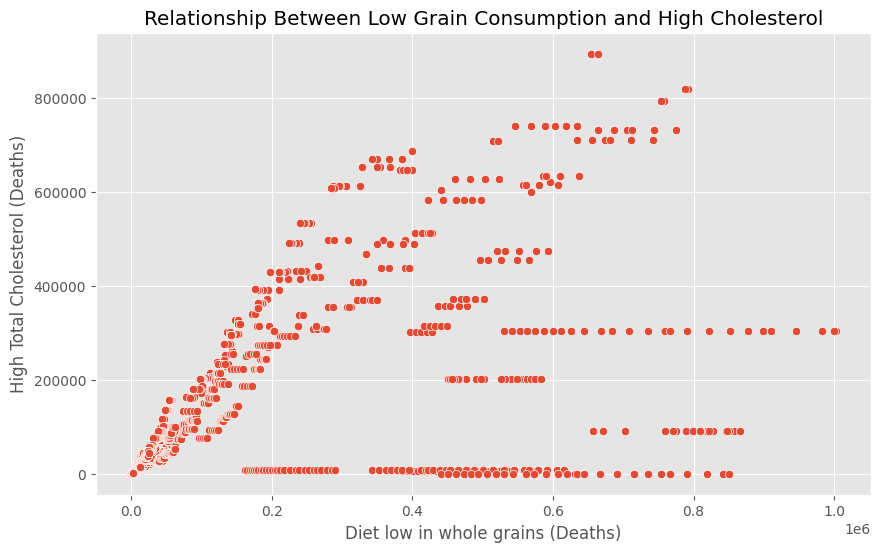

In [ ]:
# Scatter plot for low grain consumption and high cholesterol
correlation = df_diet['Diet low in whole grains'].corr(df_diet['High total cholesterol'])
print(f'Correlation between Diet low in whole grains and High total cholestrol: {correlation}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diet low in whole grains', y='High total cholesterol', data=df_diet)
plt.title('Relationship Between Low Grain Consumption and High Cholesterol')
plt.xlabel('Diet low in whole grains (Deaths)')
plt.ylabel('High Total Cholesterol (Deaths)')
plt.show()


Are deaths  associated  with high BMI influenced by physical  activity  levels  and  sodium  intake?

                             OLS Regression Results                             
Dep. Variable:     High body-mass index   R-squared:                       0.968
Model:                              OLS   Adj. R-squared:                  0.968
Method:                   Least Squares   F-statistic:                 9.610e+04
Date:                  Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                          07:04:53   Log-Likelihood:                -75133.
No. Observations:                  6440   AIC:                         1.503e+05
Df Residuals:                      6437   BIC:                         1.503e+05
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

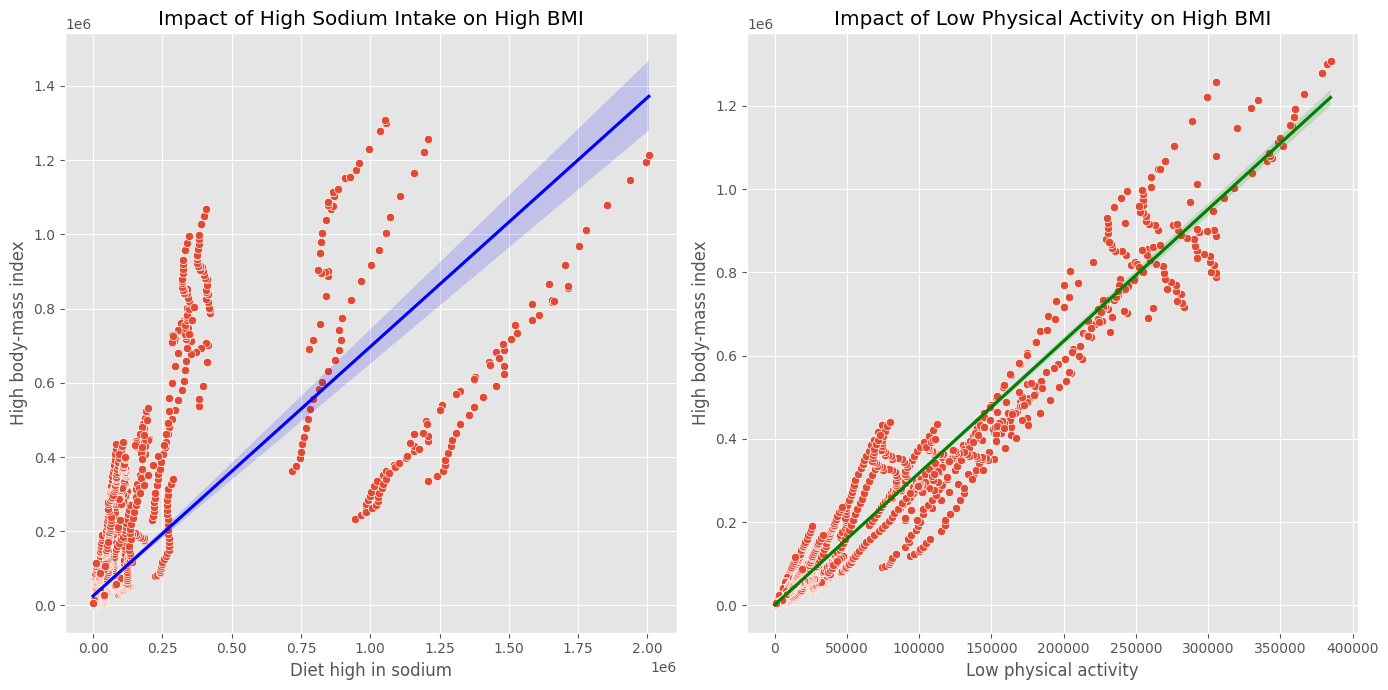

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming your data is in a DataFrame named 'df_diet'

# # Define variables for plotting
# physical_activity_data = df_diet["Low physical activity"]
# sodium_intake_data = df_diet["Diet high in sodium"]
# bmi_data = df_diet["High body-mass index"]

# corr_val = df_diet[['Low physical activity', 'Diet high in sodium', "High body-mass index"]].corr()
# print(corr_val)

# # Create the line plot with distinct colors
# plt.figure(figsize=(10, 6))
# plt.plot(physical_activity_data, bmi_data, marker='o', color='blue', label='Physical Activity')  # Blue for physical activity
# plt.plot(sodium_intake_data, bmi_data, marker='s', color='red', label='Sodium Intake')  # Red for sodium intake

# # Customize the plot
# plt.title('Determinants of High BMI: Physical Activity and Sodium Levels')
# plt.xlabel('Low Physical Activity / Diet High in Sodium (Deaths)')
# plt.ylabel('High Body-Mass Index (Deaths)')
# plt.legend()
plt.show()



# Multiple regression analysis
X = df_diet[['Diet high in sodium', 'Low physical activity']]
y = df_diet['High body-mass index']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Visualization
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Diet high in sodium', y='High body-mass index', data=df_diet)
sns.regplot(x='Diet high in sodium', y='High body-mass index', data=df_diet, scatter=False, color='blue')
plt.title('Impact of High Sodium Intake on High BMI')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Low physical activity', y='High body-mass index', data=df_diet)
sns.regplot(x='Low physical activity', y='High body-mass index', data=df_diet, scatter=False, color='green')
plt.title('Impact of Low Physical Activity on High BMI')

plt.tight_layout()
plt.show()



How have the trends  in deaths  associated  with high  systolic  blood pressure  changed  across different years?

Correlation between Diet low in nuts and seeds and High systolic blood pressure: 0.9832937233547102


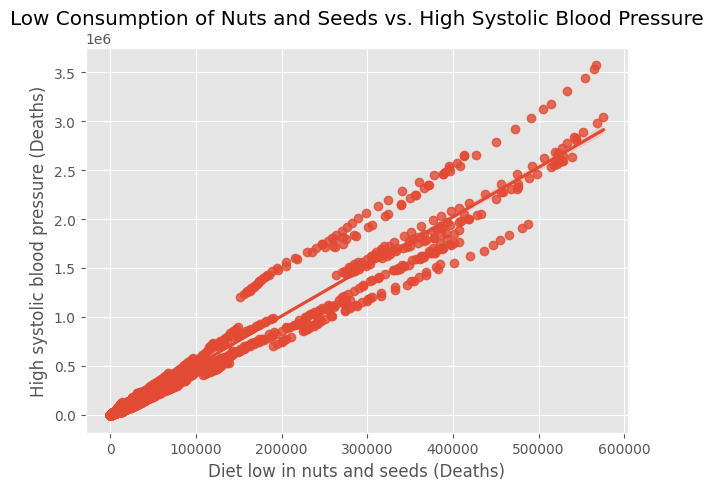

In [ ]:
# Correlation and regression analysis
correlation = df_diet['Diet low in nuts and seeds'].corr(df_diet['High systolic blood pressure'])
print(f'Correlation between Diet low in nuts and seeds and High systolic blood pressure: {correlation}')

# Regression plot
plt.figure(figsize=(7, 5))
sns.regplot(x='Diet low in nuts and seeds', y='High systolic blood pressure', data=df_diet)
plt.title('Low Consumption of Nuts and Seeds vs. High Systolic Blood Pressure')
plt.xlabel('Diet low in nuts and seeds (Deaths)')
plt.ylabel('High systolic blood pressure (Deaths)')
plt.show()


Is there any  trends  occurring  between vitamin  A deficiencies and iron deficiency over years?


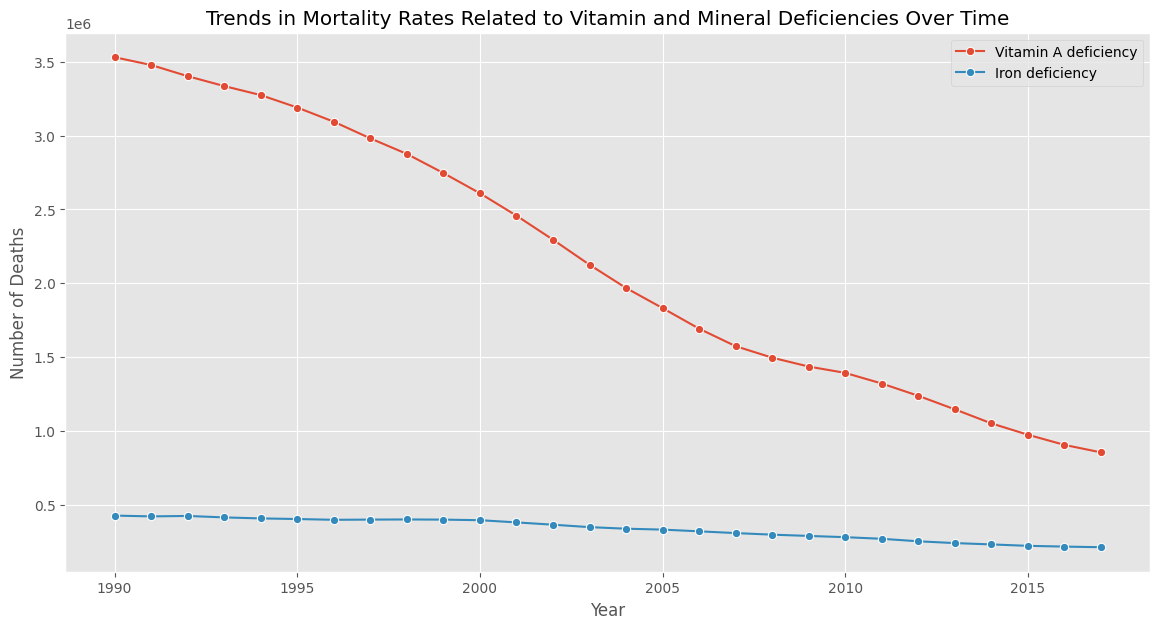

In [ ]:
diet_grouped_year = df_diet.groupby('Year').sum()

# Line plot for trends over time for vitamin and mineral deficiencies
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Vitamin A deficiency', data=diet_grouped_year, label='Vitamin A deficiency', marker='o')
sns.lineplot(x='Year', y='Iron deficiency', data=diet_grouped_year, label='Iron deficiency', marker='o')
plt.title('Trends in Mortality Rates Related to Vitamin and Mineral Deficiencies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()


                              High systolic blood pressure   Smoking  \
High systolic blood pressure                      1.000000  0.976679   
Smoking                                           0.976679  1.000000   
Alcohol use                                       0.970325  0.936966   

                              Alcohol use  
High systolic blood pressure     0.970325  
Smoking                          0.936966  
Alcohol use                      1.000000  


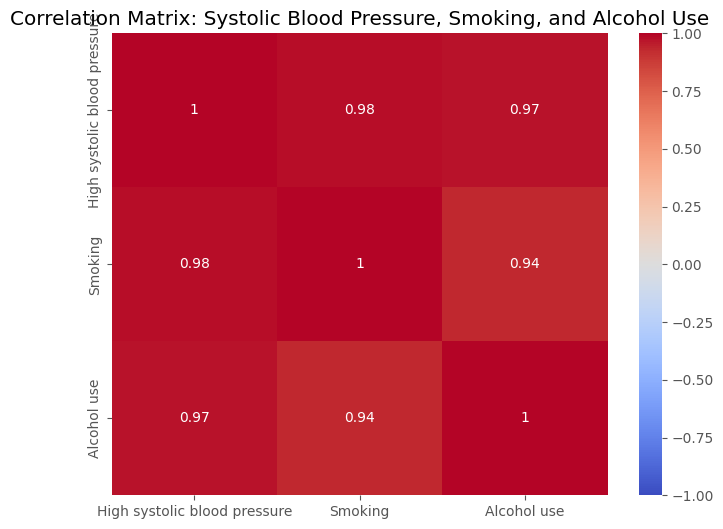

In [ ]:
# Heatmap for correlation matrix
corr_matrix_df = df_diet[['High systolic blood pressure', 'Smoking', 'Alcohol use']].corr()

print(corr_matrix_df)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Systolic Blood Pressure, Smoking, and Alcohol Use')
plt.show()

What are the trends  in mortality  rates related  to cardiovascular   diseases,  as indicated  by systolic blood pressure  levels, over the years ?

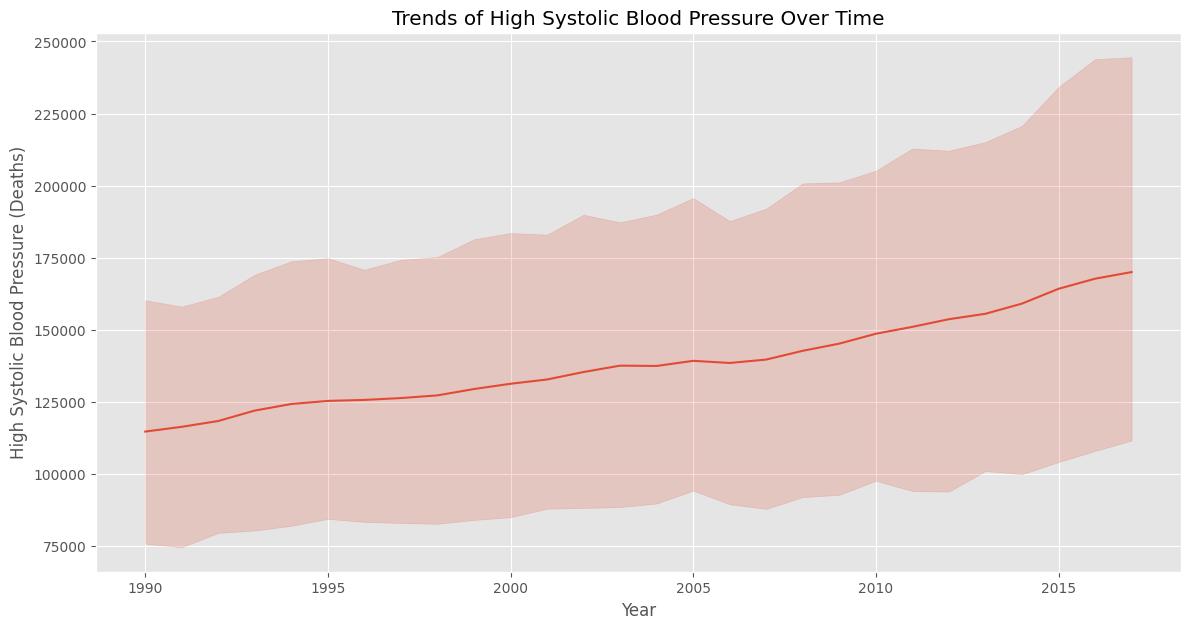

In [ ]:
# Line plot for trends in high systolic blood pressure over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='High systolic blood pressure', data=df_diet)
plt.title('Trends of High Systolic Blood Pressure Over Time')
plt.xlabel('Year')
plt.ylabel('High Systolic Blood Pressure (Deaths)')
plt.show()


Does the high  sodium  intake  and low physical  activity  on deaths  associated  with high  systolic  blood pressure?


                                 OLS Regression Results                                 
Dep. Variable:     High systolic blood pressure   R-squared:                       0.985
Model:                                      OLS   Adj. R-squared:                  0.985
Method:                           Least Squares   F-statistic:                 2.173e+05
Date:                          Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                                  07:05:00   Log-Likelihood:                -78697.
No. Observations:                          6440   AIC:                         1.574e+05
Df Residuals:                              6437   BIC:                         1.574e+05
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

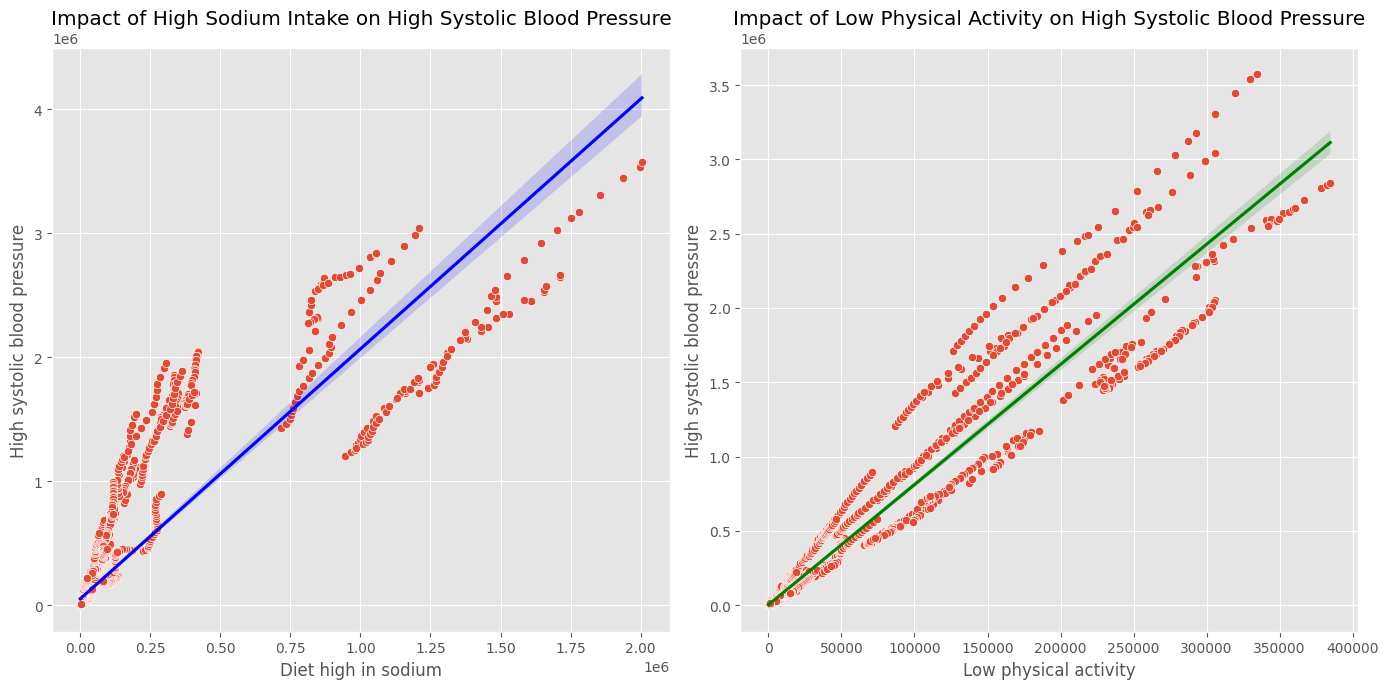

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Multiple regression analysis
X = df_diet[['Diet high in sodium', 'Low physical activity']]
y = df_diet['High systolic blood pressure']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Visualization
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Diet high in sodium', y='High systolic blood pressure', data=df_diet)
sns.regplot(x='Diet high in sodium', y='High systolic blood pressure', data=df_diet, scatter=False, color='blue')
plt.title('Impact of High Sodium Intake on High Systolic Blood Pressure')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Low physical activity', y='High systolic blood pressure', data=df_diet)
sns.regplot(x='Low physical activity', y='High systolic blood pressure', data=df_diet, scatter=False, color='green')
plt.title('Impact of Low Physical Activity on High Systolic Blood Pressure')

plt.tight_layout()
plt.show()


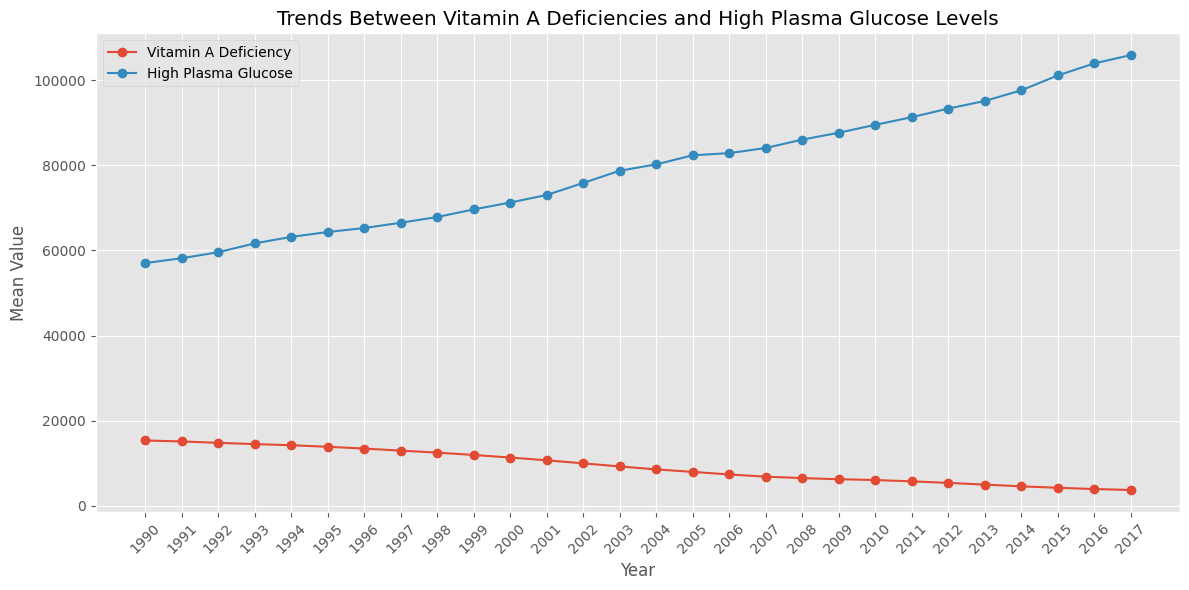

In [ ]:
# Filter data for Vitamin A deficiencies and high plasma glucose levels
vitamin_a_data = df_diet[['Year', 'Vitamin A deficiency']]
plasma_glucose_data = df_diet[['Year', 'High fasting plasma glucose']]

# Group by Year and calculate the mean
vitamin_a_mean = vitamin_a_data.groupby('Year').mean()
plasma_glucose_mean = plasma_glucose_data.groupby('Year').mean()

# Plot the trends
plt.figure(figsize=(12, 6))

# Plot Vitamin A deficiencies trend
plt.plot(vitamin_a_mean.index, vitamin_a_mean['Vitamin A deficiency'], marker='o', label='Vitamin A Deficiency')

# Plot high plasma glucose levels trend
plt.plot(plasma_glucose_mean.index, plasma_glucose_mean['High fasting plasma glucose'], marker='o', label='High Plasma Glucose')

# Set plot title and labels
plt.title('Trends Between Vitamin A Deficiencies and High Plasma Glucose Levels')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(vitamin_a_mean.index, rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

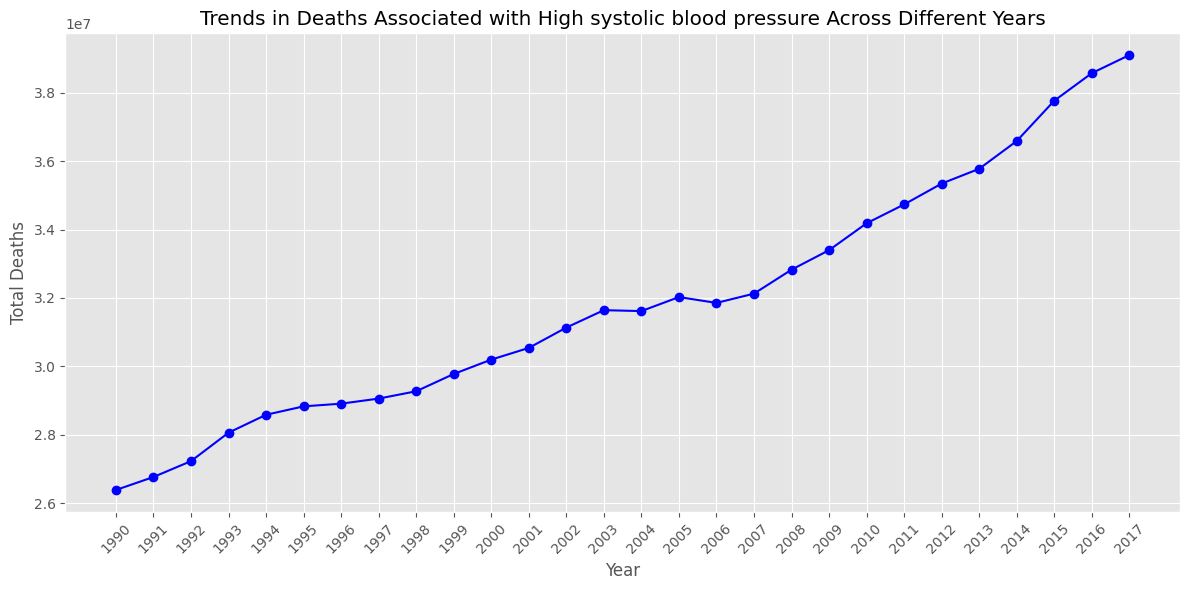

In [ ]:
# Filter data for deaths associated with high fasting plasma glucose
blood_pressure_deaths = df_diet[['Year', 'High systolic blood pressure']]

# Group by Year and calculate the total deaths
blood_pressure_deaths = blood_pressure_deaths.groupby('Year').sum()

# Plot the trends
plt.figure(figsize=(12, 6))

# Plot deaths associated with high fasting plasma glucose
plt.plot(blood_pressure_deaths.index, blood_pressure_deaths['High systolic blood pressure'], marker='o', color='blue')

# Set plot title and labels
plt.title('Trends in Deaths Associated with High systolic blood pressure Across Different Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(blood_pressure_deaths.index, rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

Does the consumption of low nuts and seeds contribute to mortality risks related to anemia, as measured by iron deficiency?

Correlation between Diet low in nuts and seeds and Iron deficiency: 0.4074837427163984


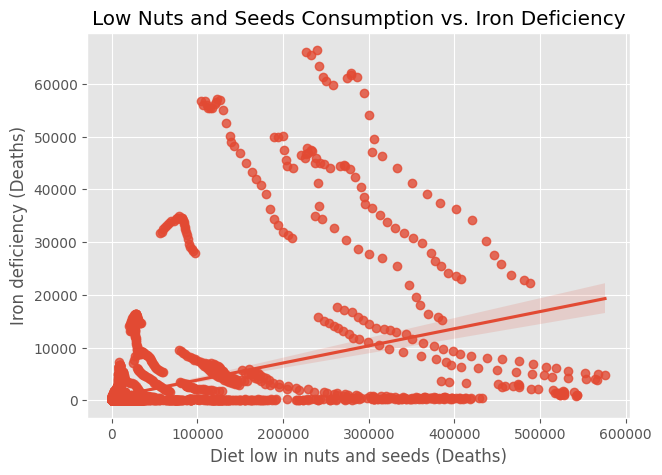

In [ ]:
# Correlation and regression analysis
correlation = df_diet['Diet low in nuts and seeds'].corr(df_diet['Iron deficiency'])
print(f'Correlation between Diet low in nuts and seeds and Iron deficiency: {correlation}')

# Regression plot
plt.figure(figsize=(7, 5))
sns.regplot(x='Diet low in nuts and seeds', y='Iron deficiency', data=df_diet)
plt.title('Low Nuts and Seeds Consumption vs. Iron Deficiency')
plt.xlabel('Diet low in nuts and seeds (Deaths)')
plt.ylabel('Iron deficiency (Deaths)')
plt.show()



Is there any causal  relationship  between the consumption  of nuts and seeds  with the low bone density  varied  by their physical  activity  levels?


<ipython-input-63-b096aaf47780>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diet['interaction'] = df_diet['Diet low in nuts and seeds'] * df_diet['Low physical activity']


                               OLS Regression Results                               
Dep. Variable:     Low bone mineral density   R-squared:                       0.840
Model:                                  OLS   Adj. R-squared:                  0.840
Method:                       Least Squares   F-statistic:                 1.128e+04
Date:                      Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                              07:05:03   Log-Likelihood:                -63439.
No. Observations:                      6440   AIC:                         1.269e+05
Df Residuals:                          6436   BIC:                         1.269e+05
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

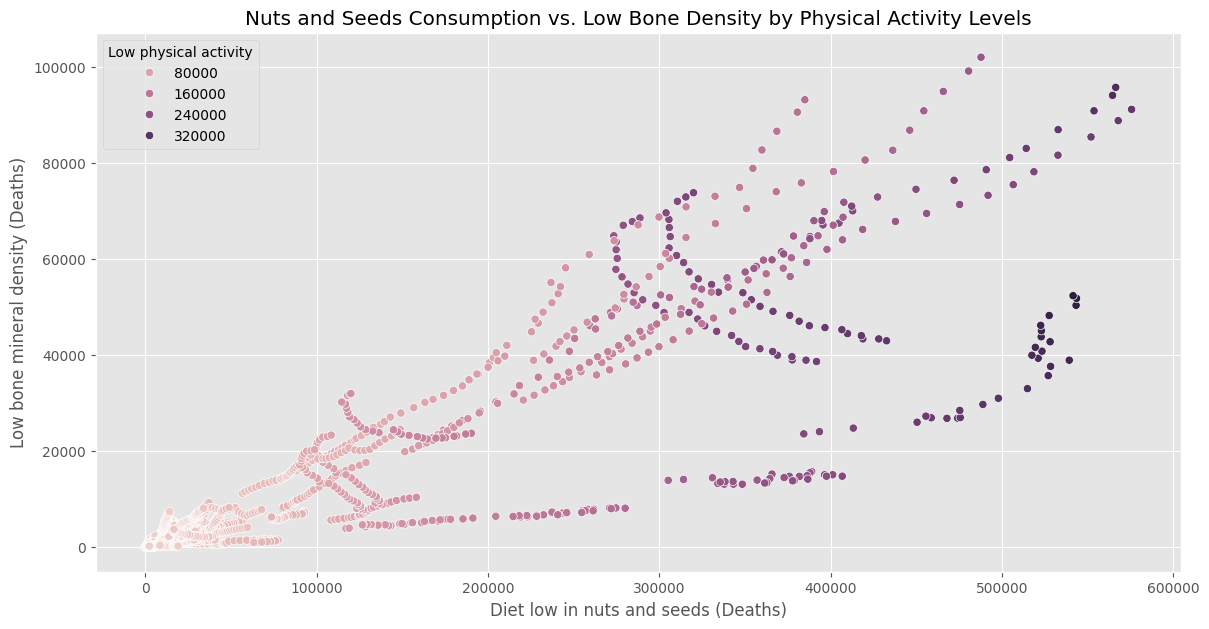

In [ ]:
# # Scatter plot for nuts and seeds consumption vs low bone mineral density
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Diet low in nuts and seeds', y='Low bone mineral density', data=df_diet)
# plt.title('Relationship Between Nuts and Seeds Consumption and Low Bone Density')
# plt.xlabel('Diet low in nuts and seeds (Deaths)')
# plt.ylabel('Low Bone Mineral Density (Deaths)')
# plt.show()
# Interaction term regression analysis
df_diet['interaction'] = df_diet['Diet low in nuts and seeds'] * df_diet['Low physical activity']
X = df_diet[['Diet low in nuts and seeds', 'Low physical activity', 'interaction']]
y = df_diet['Low bone mineral density']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Visualization
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Diet low in nuts and seeds', y='Low bone mineral density', hue='Low physical activity', data=df_diet)
plt.title('Nuts and Seeds Consumption vs. Low Bone Density by Physical Activity Levels')
plt.xlabel('Diet low in nuts and seeds (Deaths)')
plt.ylabel('Low bone mineral density (Deaths)')
# plt.legend(title='Low physical activity')
plt.show()



Mean Squared Error: 2374120408.518217
R^2 Score: 0.9504271550237308


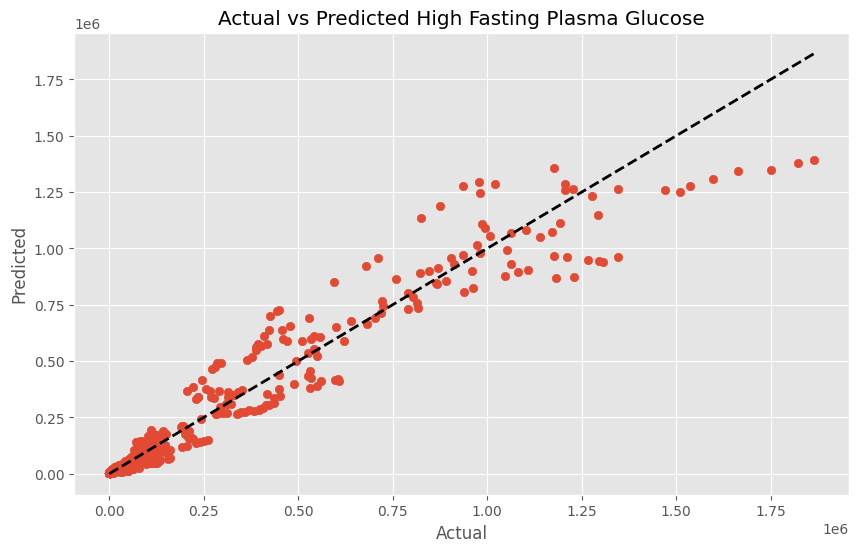

In [ ]:
# Linear regression for predicting high fasting plasma glucose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
features = df_diet[['Diet low in fruits', 'Diet low in vegetables', 'Low physical activity']]
target = df_diet['High fasting plasma glucose']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted High Fasting Plasma Glucose')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
